# **1. RNN(Recurrent Neural Network)**

## 순차 데이터  
- 순차 데이터: 순서에 의미가 있으며, 순서가 달라질 경우 의미가 손상되는 데이터  

$$
\text{시계열 데이터} \subset \text{시간적 순차 데이터} \subset \text{순차 데이터} 
$$  

- 순차 데이터 예시  
1. 음성 및 오디오 데이터  
    - 소리의 파형은 시간에 따라 연속적으로 변화하는 순차 데이터  
2. 자연어  
    - 문장, 단락, 문서 등 단어의 순서가 매우 중요한 대표적인 순차 데이터  
3. 생물학적 서열 데이터  
    - DNA, 단백질 서열처럼 특정 순서로 배열된 순차 데이터  
4. 비디오 데이터   
    - 여러 이미지 프레임이 순서대로 나열된 형태의 순차 데이터    
    
- 순차 데이터의 특징  
  - 요소의 순서 의존성: 데이터를 구성하는 요소들의 순서 자체가 핵심 정보  
  - 자기상관성: 이전 시점의 데이터가 다음 시점의 데이터에 영향을 미침  

## RNN 구조와 원리  
- RNN: **순환신경망**, 순환하는 구조를 가진, 순차 데이터 처리에 특화된 인공신경망  
- 순환신경망  
  1. 시퀀스 데이터를 입력받아 순서 정보를 유지하며 처리    
  2. 순환하는 은닉층이 매 시점의 은닉 상태 업데이트  
  3. 이전 시점의 값을 현재 시점으로 넘겨줌  

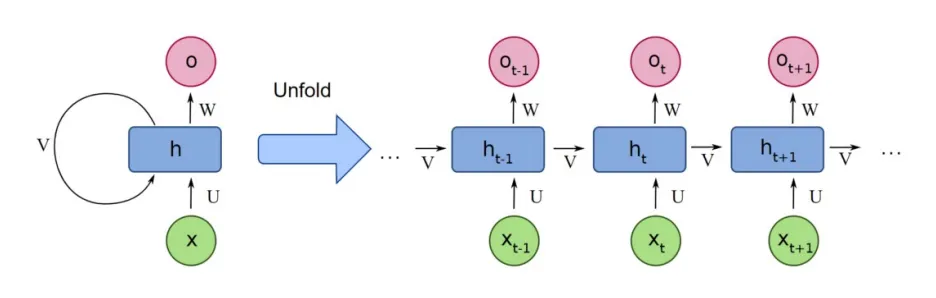  

- $x_t$: 시간 스텝  $t$에서의 **입력 (Input)**
- $h_t$: 시간 스텝  $t$에서의 **은닉 상태 (Hidden State)**. 이 시점의 '**메모리**'입니다.
- $o_t$: 시간 스텝  $t$에서의 **출력 (Output)**
- $U$(**입력 가중치**):
    - 현재 시점  $t$의 입력($x_t$)이 은닉 상태($h_t$)에 영향을 주는 가중치
    - **현재 정보**를 처리하는 역할
- $V$(**순환 가중치**):
    - 이전 시점 $t-1$의 은닉 상태($h_{t-1}$)가 현재 은닉 상태에 영향을 주는 가중치
    - **과거 정보**를 **다음 시점으로 전달**하는 **핵심 역할**
- $W$(**출력 가중치**):
    - 현재 시점 $t$의 은닉 상태($h_{t}$)가 최종 출력($o_t$)에 영향을 미치는 가중치
    - 계산된 메모리를 바탕으로 **결과**를 만들어내는 역할 

**기존 신경망과의 차이점** 
- V(순환 가중치)의 유무  
RNN에서는 V(순환 가중치)를 통해 이전 시점의 정보를 전달  
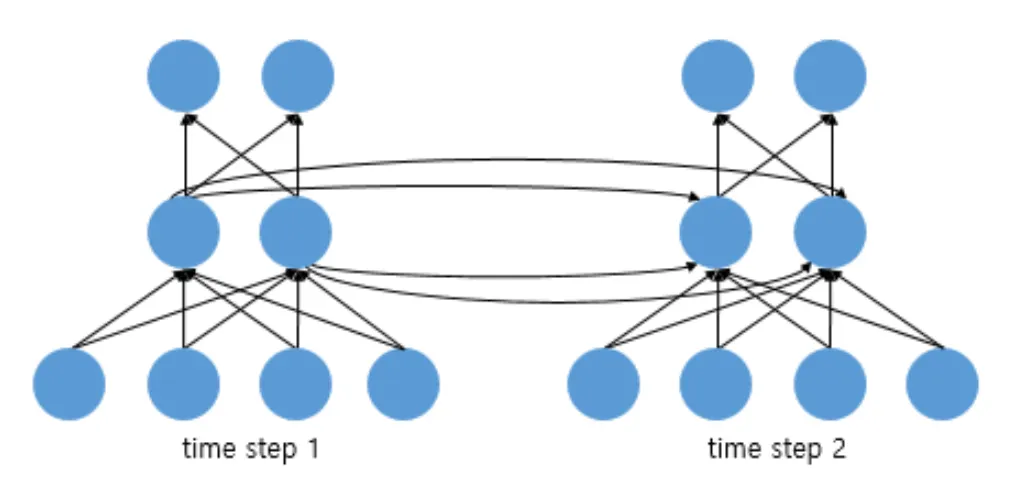  
- 정보 흐름
    - **$t−1$  시점**: 입력 $x_{t-1}$이 들어가서 은닉 상태 $h_{t-1}$을 업데이트, 출력: $o_{t-1}$
    - **$t$  시점**:  $t−1$ 시점에서 계산된 **은닉 상태 $h_{t-1}$가 다음 시점으로 그대로 전달**
    - **새로운 입력** $xt$와 전달받은 **과거 정보** $h_{t-1}$을 함께 사용하여 **현재 시점의 은닉 상태** $ht$를 업데이트, **출력** $ot$ 계산  

- **가중치 공유**  
  - 동일한 가중치를 시퀀스의 다양한 시점에서 반복적으로 적용  
  - 동일한 파라미터(입력 가중치(U), 순환 가중치(W), 편향(b)) 를 공유하는 구조  
  - 장점:  
    - 학습 파라미터 수 감소: 학습해야 할 파라미터 수가 일정하게 유지  
    - 일반화 능력 향상: “이전 시점까지의 정보와 현재 시점의 입력이 주어졌을 때, 어떻게 상태(메모리)를 업데이트할 것인가?”라는 하나의 일반적 규칙 학습  
    

## RNN의 한계 및 장기 의존성 문제  
- **RNN의 한계점**  
  - 전체 시퀀스를 모두 읽은 후 역전파가 이루어짐⇒ 역전파를 구하는 과정에서 chain rule에 의해 다음 미분값이 반복적으로 곱해짐  
  - **기울기 소실**: 역전파 과정에서 반복적으로 곱해지는 기울기(미분값)의 크기가 1보다 작을 때⇒**기울기가 0으로 수렴**  
  - **기울기 폭주**: 역전파 과정에서 반복적으로 곱해지는 기울기(미분값)의 크기가 1보다 클 때⇒**기울기가 무한대로 발산**  
  - **장기 의존성 문제**: **시퀀스 앞 부분의 중요한 정보를 잊어버려** 맥락 파악 능력이 급격히 저하되는 현상   
  

# **2. LSTM & GRU**

## LSTM  

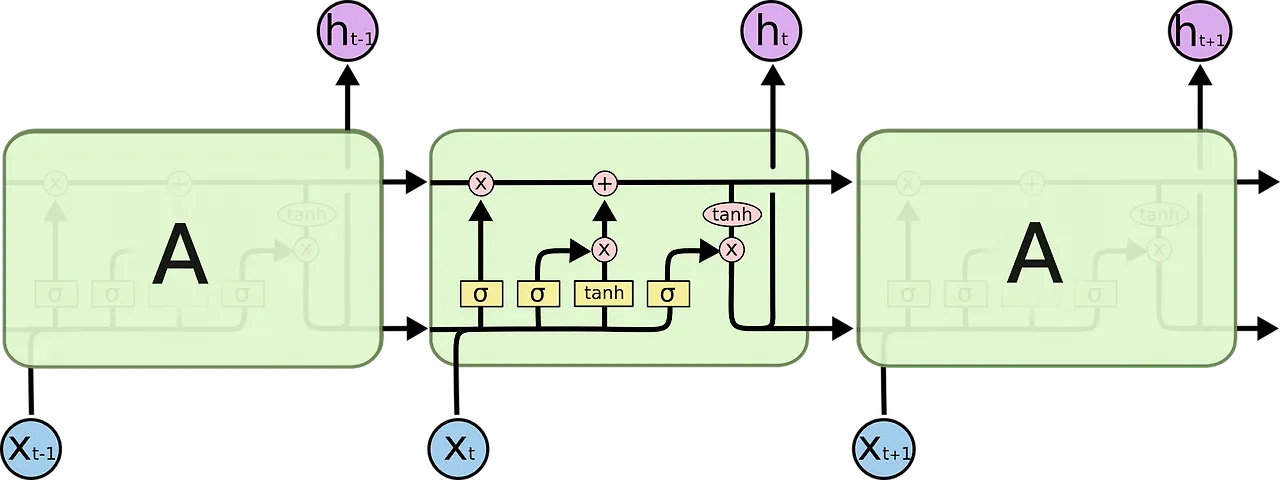


- RNN의 기울기 소실 문제를 해결하기 위한 모델 구조  
- 기억할 내용과 잊어버릴 내용을 선택해서, 중요한 정보들을 오래 가져감  
- RNN과의 주요 차이: $c_t\text{와}\space h_t$의 2개의 순환되는 층을 사용한다.(RNN에서는 $h_t$ 1개)  
- **Gate를 통해 필요한 정보들만 통과** 
    - Forget gate: 정보를 **얼마나 잊어**버릴지 결정
    - Input gate: 현재 정보를 **얼마나 사용**할지 결정
    - Output gate: 다음 층으로 **어떤 정보를 전달**할지 결정(hidden state를 만듦)  
- Final memory cell: Input, forget gate를 결합해 현재 정보를 얼마나 기억할지 계산  

## LSTM 장점 & 단점  
- 장점: Vanishing gradient problem 효과적으로 완화 (≠해결)  
- 단점: (많이) 복잡한 구조, RNN보다 학습 파라미터가 많아짐  

## GRU  

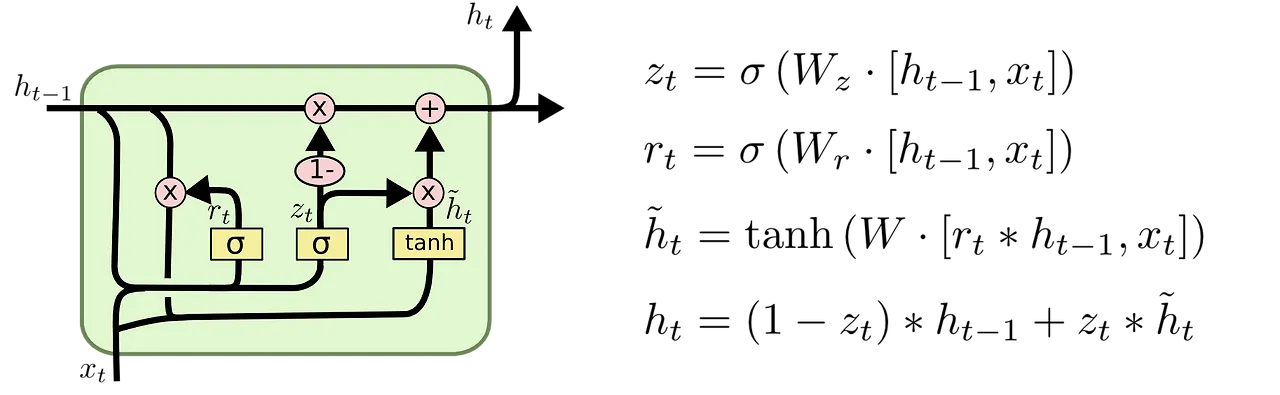  


- 별도의 메모리 셀 없이 게이트 수를 줄여 구조를 간소화  
- **LSTM과의 차이점**    
  - Forget gate와 input gate를 **update gate 하나로 합침.**  
  - **Reset gate 사용**  
  - **Gate의 개수가 3개에서 2개로** 줄어 학습 시간이 줄어듦 → 학습 시간은 줄어들지만 성능은 LSTM과 유사하거나 더 좋음  

## GRU 장점 & 단점  
- 장점: 성능과 효율성 사이의 균형이 좋다  
- 단점: 긴 시퀀스 처리에서의 한계는 여전히 존재

## LSTM & GRU 비교  

|구분|LSTM|GRU|
|---|-------|-------|
|구조|3개 게이트 (입력, 삭제, 출력)|2개 게이트 (업데이트, 리셋)|
|복잡도|더 복잡, 파라미터 수 많음|단순, 파라미터 수 적음|
|학습 속도|느림 (계산량 많음)|빠름 (계산량 적음)|
|메모리 사용량|큼|작음|
|장기 의존성 처리|더 강력|LSTM과 비교해 다소 약함|
|연구/사례 축적|매우 많음|비교적 적음 (최근 등장)|
|성능|데이터가 충분하고 문제 복잡성이 높을 때 강력|데이터가 적거나 효율성이 중요할 때 유리|  

- **LSTM 적합한 경우**
    - 긴 시퀀스에서 문맥 이해가 중요한 작업
    - 데이터 양이 충분하고 복잡한 패턴을 학습해야 하는 경우
    - 모델 성능이 계산 효율보다 더 중요한 경우
    - 기계 번역, 언어 모델링, 장기 시계열 예측 (예: 금융, 기후 데이터)  

- **GRU 적합한 경우**
    - 자원이 제한적이거나 학습 속도가 중요한 경우
    - 데이터 양이 적고 과적합 위험이 있는 경우
    - 실시간 예측이 필요한 응용
    - 사용 예시: 음성 인식, 스트리밍 데이터, 실시간 비디오 분석, 짧은 시퀀스 기반의 텍스트 분류

# **3. Seq2Seq**  

## Seq2Seq   

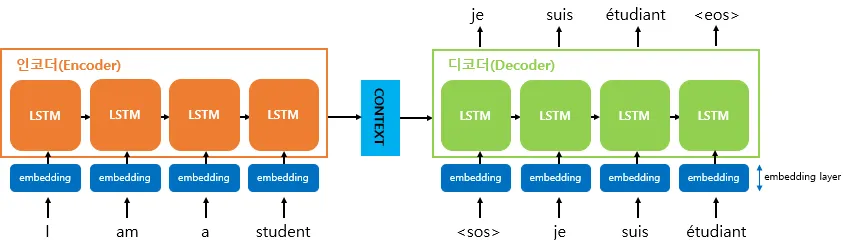  


- Seq2Seq: 한 시퀀스를 다른 시퀀스로 변환하는 작업을 수행하는 딥러닝 모델  
- input sequence -> Encoder -> context vector -> output sequence  

- Encoder  
  - 입력된 시퀀스를 읽고 압축(context vector)하여 디코더에게 넘겨줄 문맥 정보 준비  
- Decoder  
  - 압축된 정보를 바탕으로 원하는 시퀀스 생성  
- Comtext Vector  
  - float형의 벡터 형태, 인코더 중 마지막 시점의 은닉 상태(hidden state)를 의미  
  - 입력 시퀀스의 **요약 정보**처럼 작동  

## Seq2Seq의 한계  
- **병목 현상**  
  - 고정된 Context Vector에 소스 문장의 정보 압축 → 병목 현상 발생  
  - 고정된 길이에 입력 시퀸스의 모든 정보를 담지 못하고 정보 손실  
- 기울기 소실 문제: 시퀀스가 길어질수록 앞쪽에 있는 단어의 영향력이 사라짐  
- 병렬화 불가능 문제: 순차적으로 입력 처리 -> 시퀀스 길어질수록 학습시간 길어짐 